## Расчет жилищной обеспеченности

In [73]:
import pandas as pd
import numpy as np
import geopandas as gpd
import warnings
from shapely import wkt, Polygon, Point
warnings.simplefilter(action='ignore', category=FutureWarning)

In [74]:
areas = pd.read_csv('data/new_data/areas-pop-geom-space-fff.csv')
areas['hs_ratio'] = areas['population'] / areas['living_space']
areas = areas.drop(columns=['field_1'])
areas['geometry'] = areas['geometry'].apply(wkt.loads)
areas

,district_code,area_name,population,geometry,space,living_space,hs_ratio
0,zo,Внуково,24687,"POLYGON ((37.2458 55.6019109, 37.2418516 55.59...",378945.00,169846.50,0.145349
1,zo,Можайский,137634,"POLYGON ((37.3307568 55.685325, 37.3294276 55....",3525138.10,2951192.00,0.046637
2,svo,Бибирево,158939,"POLYGON ((37.6440665 55.8976996, 37.6356092 55...",2572168.20,2430648.30,0.065390
3,vo,Богородское,110049,"POLYGON ((37.6874473 55.8167675, 37.6878233 55...",2338132.30,2171861.02,0.050670
4,uo,Братеево,108582,"POLYGON ((37.7295024 55.6408925, 37.7453811 55...",1844167.50,1758697.07,0.061740
...,...,...,...,...,...,...,...
87,tso,Красносельский,47865,"POLYGON ((37.684842 55.7808113, 37.684818 55.7...",1209627.35,855932.54,0.055921
88,tso,Мещанский,60044,"POLYGON ((37.620909 55.7589912, 37.6215936 55....",1788118.70,1274209.79,0.047123
89,tso,Пресненский,128784,"POLYGON ((37.5812267 55.7745578, 37.5814805 55...",4685420.60,3314867.87,0.038850
90,tso,Таганский,123382,"POLYGON ((37.6352868 55.7538551, 37.6352315 55...",3213656.90,2499755.06,0.049358


In [75]:
areas_geom = gpd.GeoDataFrame(
    areas, geometry=areas.geometry)
areas_geom.head()

,district_code,area_name,population,geometry,space,living_space,hs_ratio
0,zo,Внуково,24687,"POLYGON ((37.24580 55.60191, 37.24185 55.59705...",378945.0,169846.50,0.145349
1,zo,Можайский,137634,"POLYGON ((37.33076 55.68532, 37.32943 55.68579...",3525138.1,2951192.00,0.046637
2,svo,Бибирево,158939,"POLYGON ((37.64407 55.89770, 37.63561 55.89368...",2572168.2,2430648.30,0.065390
3,vo,Богородское,110049,"POLYGON ((37.68745 55.81677, 37.68782 55.81691...",2338132.3,2171861.02,0.050670
4,uo,Братеево,108582,"POLYGON ((37.72950 55.64089, 37.74538 55.63990...",1844167.5,1758697.07,0.061740


<AxesSubplot: >

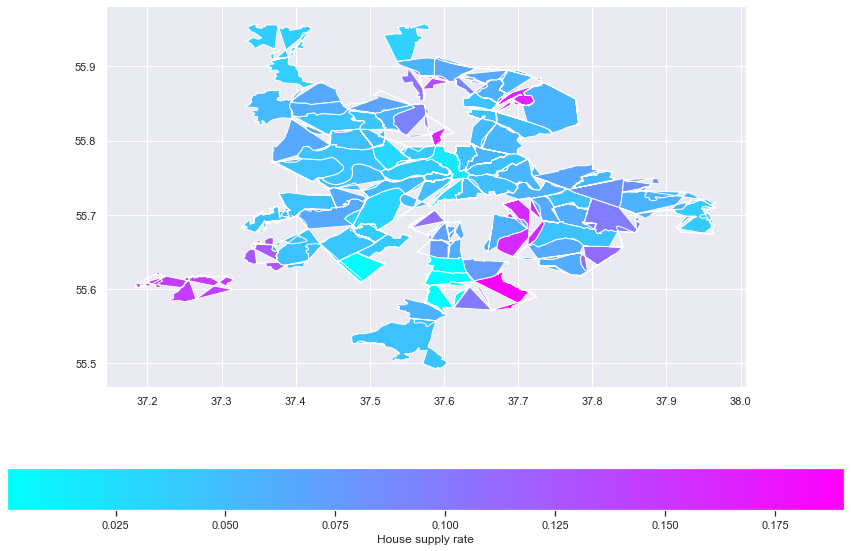

In [76]:
areas_geom.plot(column='hs_ratio', legend=True, legend_kwds={"label": "House supply rate", "orientation": "horizontal"}, cmap='cool', figsize=(15, 10))

##  МНК для домов

In [77]:
head_dict = {
    "Адрес ОЖФ": "addr",
    "Глобальный уникальный идентификатор дома по ФИАС": "fias_code",
    "Способ управления": "lead_type",
    "Наименование организации, осуществляющей управление домом": "lead_name",
    "Тип дома" : "type",
    "Состояние": "cond",
    "Общая площадь дома": "space",
    "Жилая площадь в доме": "living_space",
    "Дом находится в собственности субъекта Российской Федерации и в полном объеме используется в качестве общежития" : "dorm_federal",
    "Дом находится в муниципальной собственности и в полном объеме используется в качестве общежития" : "dorm_municipal",
    "Тип общежития" : "dorm_type",
    "Тип помещения (блока)": "room_type",
    "Дата сноса объекта" : "demolition_date",
    "geometry" : "geometry",
    "lat": "lat",
    "lon": "lon",
    "area_num": "area_num",
}

In [78]:
houses  = pd.read_csv('data/new_data/mow-reestr-areas/Внуково.csv')
houses = houses.iloc[0:0]
houses_dict = dict()
houses_real_order = dict()
i = 0
for areas_geom_index, areas_geom_row in areas_geom.iterrows():
    area_name = areas_geom_row['area_name']
    houses_dict[area_name] = areas_geom_index
    houses_real_order[area_name] = i
    print(areas_geom_index, area_name)
    houses = houses.append(pd.read_csv(f'data/new_data/mow-reestr-areas/{area_name}.csv'), ignore_index=True)
    i += 1


0 Внуково
1 Можайский
2 Бибирево
3 Богородское
4 Братеево
5 Коптево
6 Крылатское
7 Некрасовка
8 Проспект Вернадского
9 Ростокино
10 Свиблово
11 Северный
12 Сокольники
13 Академический
14 Алексеевский
15 Алтуфьевский
16 Бабушкинский
17 Бутырский
18 Войковский
19 Головинский
20 Лосиноостровский
21 Молжаниновский
22 Нагорный
23 Нижегородский
24 Ново-Переделкино
25 Обручевский
26 Беговой
27 Бирюлёво Восточное
28 Бирюлёво Западное
29 Вешняки
30 Восточное Дегунино
31 Дорогомилово
32 Зюзино
33 Капотня
34 Косино-Ухтомский
35 Котловка
36 Кузьминки
37 Куркино
38 Лефортово
39 Лианозово
40 Люблино
41 Марьино
42 Метрогородок
43 Митино
44 Нагатинский Затон
45 Новогиреево
46 Новокосино
47 Очаково-Матвеевское
48 Перово
49 Печатники
50 Покровское-Стрешнево
51 Раменки
52 Северное Бутово
53 Северное Медведково
54 Северное Тушино
55 Сокол
56 Солнцево
57 Строгино
58 Текстильщики
59 Тёплый Стан
60 Фили-Давыдково
61 Хамовники
62 Хорошёво-Мнёвники
63 Царицыно
64 Чертаново Северное
65 Чертаново Центральное
66 

In [79]:
i = 0
for area_name in houses_real_order:
    houses_real_order[area_name] = i
    i += 1
houses_real_order

{'Внуково': 0,
 'Можайский': 1,
 'Бибирево': 2,
 'Богородское': 3,
 'Братеево': 4,
 'Коптево': 5,
 'Крылатское': 6,
 'Некрасовка': 7,
 'Проспект Вернадского': 8,
 'Ростокино': 9,
 'Свиблово': 10,
 'Северный': 11,
 'Сокольники': 12,
 'Академический': 13,
 'Алексеевский': 14,
 'Алтуфьевский': 15,
 'Бабушкинский': 16,
 'Бутырский': 17,
 'Войковский': 18,
 'Головинский': 19,
 'Лосиноостровский': 20,
 'Молжаниновский': 21,
 'Нагорный': 22,
 'Нижегородский': 23,
 'Ново-Переделкино': 24,
 'Обручевский': 25,
 'Беговой': 26,
 'Бирюлёво Восточное': 27,
 'Бирюлёво Западное': 28,
 'Вешняки': 29,
 'Восточное Дегунино': 30,
 'Дорогомилово': 31,
 'Зюзино': 32,
 'Капотня': 33,
 'Косино-Ухтомский': 34,
 'Котловка': 35,
 'Кузьминки': 36,
 'Куркино': 37,
 'Лефортово': 38,
 'Лианозово': 39,
 'Люблино': 40,
 'Марьино': 41,
 'Метрогородок': 42,
 'Митино': 43,
 'Нагатинский Затон': 44,
 'Новогиреево': 45,
 'Новокосино': 46,
 'Очаково-Матвеевское': 47,
 'Перово': 48,
 'Печатники': 49,
 'Покровское-Стрешнево':

In [80]:
houses = houses[head_dict.keys()]
houses = houses.rename(columns=head_dict)
houses

,addr,fias_code,lead_type,lead_name,type,cond,space,living_space,dorm_federal,dorm_municipal,dorm_type,room_type,demolition_date,geometry,lat,lon,area_num
0,"108809, Москва г, д. Толстопальцево, ул. Совет...",e2b601d1-9dce-4daa-93c2-633ee59f7f5c,Не выбран,NaN,Жилой,Исправный,90.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
1,"108809, Москва г, д. Толстопальцево, ул. Совет...",1389f7e1-1948-43c5-a769-944efdf1777d,Не выбран,NaN,Жилой,Исправный,211.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
2,"108809, Москва г, д. Толстопальцево, ул. Совет...",1bd548bd-d46a-4991-9062-57eeb638a2ce,Не выбран,NaN,Жилой,Исправный,113.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
3,"108809, Москва г, д. Толстопальцево, ул. Совет...",ac2010c3-0c83-47e6-b67e-ea555f181975,Не выбран,NaN,Жилой,Исправный,275.0,NaN,-,-,-,NaN,NaN,POINT (37.1928963 55.6036271),55.603627,37.192896,0
4,"108809, Москва г, д. Толстопальцево, ул. Совет...",55cc8c65-03a7-46f2-ae61-e8a6e3420b25,Не выбран,NaN,Жилой,Исправный,69.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66795,"127055, Москва г, ул. Тихвинская, д. 39",adf12acf-cfca-4b7e-acab-af962a58a5de,УО,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТСЖ ...",Многоквартирный,Исправный,23595.3,16519.0,нет,нет,-,NaN,NaN,POINT (37.598968 55.791289),55.791289,37.598968,97
66796,"127055, Москва г, ул. Тихвинская, д. 3, корп. 1",01a3cfd9-65de-4712-b305-a8e9420a5576,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,13540.5,11495.0,-,-,-,NaN,NaN,POINT (37.600882 55.785939),55.785939,37.600882,97
66797,"127055, Москва г, ул. Тихвинская, д. 7",7136e1b0-e4a6-44aa-a94d-ed4f956f561c,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,2652.6,1948.0,-,-,-,NaN,NaN,POINT (37.600783 55.786779),55.786779,37.600783,97
66798,"127055, Москва г, ул. Тихвинская, д. 9",7ade45e2-1084-4c3a-8cc3-c4abc3129173,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,5328.6,1241.0,-,-,-,NaN,NaN,POINT (37.600352 55.787275),55.787275,37.600352,97


In [81]:
houses.dropna(subset = ['lon', 'lat'], inplace=True)
# houses = houses.drop_duplicates(subset=['addr'])

In [82]:
houses.shape

(66800, 17)

In [83]:
coefs = np.zeros((len(houses_real_order.keys()),houses.shape[0]))
print(len(houses_real_order.keys()))
i = 0
for area_name in houses_real_order.keys():
    n = houses_real_order[area_name]
    col_n = houses_dict[area_name]
    print(area_name, n)
    for index, row in houses.iterrows():
        if row['area_num'] == col_n:
            if not np.isnan(row['living_space']):
                coefs[n][i] = row['living_space']
                i += 1
            elif not np.isnan(row['space']):
                coefs[n][i] = row['space']
                i += 1
    print(i)


87
Внуково 0
810
Можайский 1
810
Бибирево 2
1373
Богородское 3
1582
Братеево 4
1989
Коптево 5
2098
Крылатское 6
2484
Некрасовка 7
2668
Проспект Вернадского 8
2843
Ростокино 9
3043
Свиблово 10
3194
Северный 11
3525
Сокольники 12
3525
Академический 13
3733
Алексеевский 14
3880
Алтуфьевский 15
3880
Бабушкинский 16
3935
Бутырский 17
4230
Войковский 18
4284
Головинский 19
4556
Лосиноостровский 20
4556
Молжаниновский 21
4556
Нагорный 22
5169
Нижегородский 23
5391
Ново-Переделкино 24
5575
Обручевский 25
6006
Беговой 26
6169
Бирюлёво Восточное 27
6394
Бирюлёво Западное 28
6450
Вешняки 29
6541
Восточное Дегунино 30
6759
Дорогомилово 31
6883
Зюзино 32
7123
Капотня 33
7407
Косино-Ухтомский 34
7464
Котловка 35
8483
Кузьминки 36
8710
Куркино 37
9183
Лефортово 38
9183
Лианозово 39
9497
Люблино 40
9777
Марьино 41
10008
Метрогородок 42
10509
Митино 43
10803
Нагатинский Затон 44
10803
Новогиреево 45
10963
Новокосино 46
11411
Очаково-Матвеевское 47
11669
Перово 48
12017
Печатники 49
12153
Покровское-Стр

In [84]:
coefs = coefs[:, 0:i]
print(coefs)

[[   90.    211.    113.  ...     0.      0.      0. ]
 [    0.      0.      0.  ...     0.      0.      0. ]
 [    0.      0.      0.  ...     0.      0.      0. ]
 ...
 [    0.      0.      0.  ...     0.      0.      0. ]
 [    0.      0.      0.  ...     0.      0.      0. ]
 [    0.      0.      0.  ...   533.  12933.  15041.1]]


In [85]:
anses = np.zeros((len(houses_dict.keys()), 1))
for area_name in houses_dict.keys():
    n = houses_real_order[area_name]
    print(area_name, n)
    for index, row in areas_geom.iterrows():
        if row['area_name'] == area_name:
            anses[n][0] = row['population']
            break
anses

Внуково 0
Можайский 1
Бибирево 2
Богородское 3
Братеево 4
Коптево 5
Крылатское 6
Некрасовка 7
Проспект Вернадского 8
Ростокино 9
Свиблово 10
Северный 11
Сокольники 12
Академический 13
Алексеевский 14
Алтуфьевский 15
Бабушкинский 16
Бутырский 17
Войковский 18
Головинский 19
Лосиноостровский 20
Молжаниновский 21
Нагорный 22
Нижегородский 23
Ново-Переделкино 24
Обручевский 25
Беговой 26
Бирюлёво Восточное 27
Бирюлёво Западное 28
Вешняки 29
Восточное Дегунино 30
Дорогомилово 31
Зюзино 32
Капотня 33
Косино-Ухтомский 34
Котловка 35
Кузьминки 36
Куркино 37
Лефортово 38
Лианозово 39
Люблино 40
Марьино 41
Метрогородок 42
Митино 43
Нагатинский Затон 44
Новогиреево 45
Новокосино 46
Очаково-Матвеевское 47
Перово 48
Печатники 49
Покровское-Стрешнево 50
Раменки 51
Северное Бутово 52
Северное Медведково 53
Северное Тушино 54
Сокол 55
Солнцево 56
Строгино 57
Текстильщики 58
Тёплый Стан 59
Фили-Давыдково 60
Хамовники 61
Хорошёво-Мнёвники 62
Царицыно 63
Чертаново Северное 64
Чертаново Центральное 65
Чер

array([[ 24687.],
       [137634.],
       [158939.],
       [110049.],
       [108582.],
       [103693.],
       [ 81677.],
       [ 87867.],
       [ 64436.],
       [ 39961.],
       [ 62401.],
       [ 39030.],
       [ 60756.],
       [110161.],
       [ 79193.],
       [ 57361.],
       [ 88092.],
       [ 70957.],
       [ 70499.],
       [102722.],
       [ 83221.],
       [ 11974.],
       [ 80724.],
       [ 45486.],
       [122202.],
       [ 87015.],
       [ 41991.],
       [152843.],
       [ 87787.],
       [120953.],
       [ 98046.],
       [ 75105.],
       [126776.],
       [ 33761.],
       [ 82250.],
       [ 66619.],
       [144246.],
       [ 34153.],
       [ 95397.],
       [ 85475.],
       [173201.],
       [252623.],
       [ 38310.],
       [197386.],
       [120899.],
       [ 99823.],
       [107246.],
       [129002.],
       [140243.],
       [ 85219.],
       [ 58975.],
       [141754.],
       [ 96753.],
       [128028.],
       [164120.],
       [ 5

In [86]:
print(coefs.shape)
# Вычисляем псевдообратную матрицу A
A_pinv = np.linalg.pinv(coefs)

# Вычисляем решение методом наименьших квадратов
x = A_pinv.dot(anses)

(87, 59852)


In [87]:
houses_predictions  = houses[['addr', 'living_space', 'space', 'area_num']]
houses_predictions['hs_ratio_pred'] = [0 for _ in range(houses_predictions.shape[0])]
houses_predictions['slau_pred'] = [0 for _ in range(houses_predictions.shape[0])]
houses_predictions['actual_space'] = [0 for _ in range(houses_predictions.shape[0])]
houses_predictions

/var/folders/xq/qzhlj_357vs3kfkjsn1vg4rm0000gn/T/ipykernel_28428/130613729.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xq/qzhlj_357vs3kfkjsn1vg4rm0000gn/T/ipykernel_28428/130613729.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xq/qzhlj_357vs3kfkjsn1vg4rm0000gn/T/ipykernel_28428/130613729.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,addr,living_space,space,area_num,hs_ratio_pred,slau_pred,actual_space
0,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,90.0,0,0,0,0
1,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,211.0,0,0,0,0
2,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,113.0,0,0,0,0
3,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,275.0,0,0,0,0
4,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,69.0,0,0,0,0
...,...,...,...,...,...,...,...
66795,"127055, Москва г, ул. Тихвинская, д. 39",16519.0,23595.3,97,0,0,0
66796,"127055, Москва г, ул. Тихвинская, д. 3, корп. 1",11495.0,13540.5,97,0,0,0
66797,"127055, Москва г, ул. Тихвинская, д. 7",1948.0,2652.6,97,0,0,0
66798,"127055, Москва г, ул. Тихвинская, д. 9",1241.0,5328.6,97,0,0,0


In [88]:
i = 0
for area_name in houses_real_order.keys():
    n = houses_real_order[area_name]
    col_n = houses_dict[area_name]
    for index, row in houses.iterrows():
        if row['area_num'] == col_n:
            sp = 0
            if not np.isnan(row['living_space']):
                sp = row['living_space']
            elif not np.isnan(row['space']):
                sp = row['space']
            if not np.isnan(row['living_space']) or not np.isnan(row['space']):
                houses_predictions.loc[houses_predictions["addr"] == row['addr'], "slau_pred"] = x[i][0]
                houses_predictions.loc[houses_predictions["addr"] == row['addr'], "actual_space"] = sp
                i += 1

    print(n, i)
houses_predictions

0 810
1 810
2 1373
3 1582
4 1989
5 2098
6 2484
7 2668
8 2843
9 3043
10 3194
11 3525
12 3525
13 3733
14 3880
15 3880
16 3935
17 4230
18 4284
19 4556
20 4556
21 4556
22 5169
23 5391
24 5575
25 6006
26 6169
27 6394
28 6450
29 6541
30 6759
31 6883
32 7123
33 7407
34 7464
35 8483
36 8710
37 9183
38 9183
39 9497
40 9777
41 10008
42 10509
43 10803
44 10803
45 10963
46 11411
47 11669
48 12017
49 12153
50 12404
51 12923
52 13048
53 13302
54 13629
55 13629
56 13781
57 14004
58 14312
59 14312
60 14636
61 15010
62 15010
63 15417
64 15737
65 20090
66 20421
67 20421
68 21042
69 21359
70 25220
71 48365
72 52648
73 52725
74 54361
75 54468
76 54806
77 55070
78 56006
79 56516
80 57036
81 57329
82 57743
83 58739
84 58896
85 59128
86 59852


,addr,living_space,space,area_num,hs_ratio_pred,slau_pred,actual_space
0,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,90.0,0,0,0.002383,90.0
1,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,211.0,0,0,0.005586,211.0
2,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,113.0,0,0,0.002991,113.0
3,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,275.0,0,0,0.007280,275.0
4,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,69.0,0,0,0.001827,69.0
...,...,...,...,...,...,...,...
66795,"127055, Москва г, ул. Тихвинская, д. 39",16519.0,23595.3,97,0,0.000000,0.0
66796,"127055, Москва г, ул. Тихвинская, д. 3, корп. 1",11495.0,13540.5,97,0,0.000000,0.0
66797,"127055, Москва г, ул. Тихвинская, д. 7",1948.0,2652.6,97,0,0.000000,0.0
66798,"127055, Москва г, ул. Тихвинская, д. 9",1241.0,5328.6,97,0,0.000000,0.0


In [89]:
houses_predictions_copy = houses_predictions

houses_predictions['slau_pred_ppl'] = houses_predictions['slau_pred'] * houses_predictions['actual_space']

houses_predictions

/var/folders/xq/qzhlj_357vs3kfkjsn1vg4rm0000gn/T/ipykernel_28428/2277738663.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,addr,living_space,space,area_num,hs_ratio_pred,slau_pred,actual_space,slau_pred_ppl
0,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,90.0,0,0,0.002383,90.0,0.214425
1,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,211.0,0,0,0.005586,211.0,1.178571
2,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,113.0,0,0,0.002991,113.0,0.338024
3,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,275.0,0,0,0.007280,275.0,2.001964
4,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,69.0,0,0,0.001827,69.0,0.126034
...,...,...,...,...,...,...,...,...
66795,"127055, Москва г, ул. Тихвинская, д. 39",16519.0,23595.3,97,0,0.000000,0.0,0.000000
66796,"127055, Москва г, ул. Тихвинская, д. 3, корп. 1",11495.0,13540.5,97,0,0.000000,0.0,0.000000
66797,"127055, Москва г, ул. Тихвинская, д. 7",1948.0,2652.6,97,0,0.000000,0.0,0.000000
66798,"127055, Москва г, ул. Тихвинская, д. 9",1241.0,5328.6,97,0,0.000000,0.0,0.000000


In [90]:
i = 0
for area_name in houses_real_order.keys():
    n = houses_real_order[area_name]
    col_n = houses_dict[area_name]
    ratio = areas_geom[areas_geom['area_name'] == area_name]['hs_ratio']
    print(ratio.mean())
    for index, row in houses.iterrows():
        if row['area_num'] == col_n:
            sp = 0
            if not np.isnan(row['living_space']):
                sp = row['living_space']
            elif not np.isnan(row['space']):
                sp = row['space']
            if not np.isnan(row['living_space']) or not np.isnan(row['space']):
                houses_predictions.loc[houses_predictions["addr"] == row['addr'], "hs_ratio_pred"] = float(ratio.mean())
                i += 1

    print(n, i)
houses_predictions

0.1453488885552543
0 810
0.046636748812005455
1 810
0.06538955059849672
2 1373
0.05067036932225069
3 1582
0.06174002439203472
4 1989
0.05609755687195287
5 2098
0.04629606012179124
6 2484
0.038460560172169485
7 2668
0.03879271456493286
8 2843
0.04673225078452317
9 3043
0.04432737028467165
10 3194
0.03474909868690608
11 3525
0.05463908356418128
12 3525
0.10621688044355367
13 3733
0.05119186753062736
14 3880
0.134042828788112
15 3880
0.05924209065010207
16 3935
0.1655629834423017
17 4230
0.044817748741398024
18 4284
0.06869813089481111
19 4556
0.05480878044289202
20 4556
0.03790306829991097
21 4556
0.061596669549479934
22 5169
0.05815840910424721
23 5391
0.12470388414606892
24 5575
0.04022786330352453
25 6006
0.0418705468109343
26 6169
0.19075688459834383
27 6394
0.09994096007165851
28 6450
0.08169661649781283
29 6541
0.10637895040867781
30 6759
0.051019267899828746
31 6883
0.07433902005883439
32 7123
0.10993168872670248
33 7407
0.05746079322581608
34 7464
0.07041144491696144
35 8483
0.06

,addr,living_space,space,area_num,hs_ratio_pred,slau_pred,actual_space,slau_pred_ppl
0,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,90.0,0,0.145349,0.002383,90.0,0.214425
1,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,211.0,0,0.145349,0.005586,211.0,1.178571
2,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,113.0,0,0.145349,0.002991,113.0,0.338024
3,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,275.0,0,0.145349,0.007280,275.0,2.001964
4,"108809, Москва г, д. Толстопальцево, ул. Совет...",NaN,69.0,0,0.145349,0.001827,69.0,0.126034
...,...,...,...,...,...,...,...,...
66795,"127055, Москва г, ул. Тихвинская, д. 39",16519.0,23595.3,97,0.000000,0.000000,0.0,0.000000
66796,"127055, Москва г, ул. Тихвинская, д. 3, корп. 1",11495.0,13540.5,97,0.000000,0.000000,0.0,0.000000
66797,"127055, Москва г, ул. Тихвинская, д. 7",1948.0,2652.6,97,0.000000,0.000000,0.0,0.000000
66798,"127055, Москва г, ул. Тихвинская, д. 9",1241.0,5328.6,97,0.000000,0.000000,0.0,0.000000


In [91]:
# print(len(set([i[0] for i in x])))

In [92]:
houses_predictions_copy_copy = houses_predictions

In [93]:
houses_predictions['hs_ratio_ppl'] = houses_predictions['actual_space'] * houses_predictions['hs_ratio_pred']

/var/folders/xq/qzhlj_357vs3kfkjsn1vg4rm0000gn/T/ipykernel_28428/3549127403.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
# houses_predictions

In [95]:
area_predictions = areas_geom
houses_predictions.dropna(subset = ['hs_ratio_ppl', 'slau_pred_ppl'], inplace=True)
houses_predictions = houses_predictions[houses_predictions['hs_ratio_pred'] != 0]
houses_predictions = houses_predictions[houses_predictions['slau_pred_ppl'] != 0]

houses_pred_aggr = houses_predictions[['area_num', 'hs_ratio_ppl', 'slau_pred_ppl']].groupby('area_num').sum()


area_predictions['slau_pred'] = houses_pred_aggr['slau_pred_ppl']
area_predictions['hs_ratio_pred'] = houses_pred_aggr['hs_ratio_ppl']
area_predictions.dropna(subset = ['slau_pred', 'hs_ratio_pred'], inplace=True)
area_predictions

/var/folders/xq/qzhlj_357vs3kfkjsn1vg4rm0000gn/T/ipykernel_28428/2859153088.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,district_code,area_name,population,geometry,space,living_space,hs_ratio,slau_pred,hs_ratio_pred
0,zo,Внуково,24687,"POLYGON ((37.24580 55.60191, 37.24185 55.59705...",378945.00,169846.50,0.145349,24687.000000,37591.699326
2,svo,Бибирево,158939,"POLYGON ((37.64407 55.89770, 37.63561 55.89368...",2572168.20,2430648.30,0.065390,158939.000000,195958.600942
3,vo,Богородское,110049,"POLYGON ((37.68745 55.81677, 37.68782 55.81691...",2338132.30,2171861.02,0.050670,110049.000000,123161.847054
4,uo,Братеево,108582,"POLYGON ((37.72950 55.64089, 37.74538 55.63990...",1844167.50,1758697.07,0.061740,108582.000000,134090.752351
5,so,Коптево,103693,"POLYGON ((37.52162 55.81760, 37.52123 55.81731...",2020449.60,1848440.57,0.056098,103693.000000,98857.530842
...,...,...,...,...,...,...,...,...,...
87,tso,Красносельский,47865,"POLYGON ((37.68484 55.78081, 37.68482 55.78160...",1209627.35,855932.54,0.055921,47865.000000,331682.875376
88,tso,Мещанский,60044,"POLYGON ((37.62091 55.75899, 37.62159 55.75910...",1788118.70,1274209.79,0.047123,71814.468693,212951.444689
89,tso,Пресненский,128784,"POLYGON ((37.58123 55.77456, 37.58148 55.77464...",4685420.60,3314867.87,0.038850,128784.000000,36724.809169
90,tso,Таганский,123382,"POLYGON ((37.63529 55.75386, 37.63523 55.75385...",3213656.90,2499755.06,0.049358,123382.000000,37947.045800


In [96]:
# area_pred_copy = area_predictions

In [119]:
import plotly.express as px
import plotly.graph_objects as go
area_predictions = area_predictions[area_predictions['area_name'] != 'Рязанский']
area_predictions = area_predictions[area_predictions['area_name'] != 'Тимирязевский']
area_predictions = area_predictions[area_predictions['area_name'] != 'Южное Тушино']
area_predictions = area_predictions.sort_values(by=['area_name'], ascending=False)

fig = go.Figure()
fig.add_scatter(x=area_predictions['area_name'], y=area_predictions['population'], name='actual')

fig.add_scatter(x=area_predictions['area_name'], y=area_predictions['hs_ratio_pred'], name='prediction through house_supply')
area_predictions['new_predict'] = area_predictions['hs_ratio_pred']*0.6 + area_predictions['population']*0.4
fig.add_scatter(x=area_predictions['area_name'], y=area_predictions['new_predict'], name='new_prediction')
fig.update_layout(title='Population prediction', xaxis_title='Area', yaxis_title='Population', height=800)
fig.show()

In [98]:
# houses_predictions.sample(n = 5)

In [99]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import matplotlib.pyplot as plt

In [100]:

houses

,addr,fias_code,lead_type,lead_name,type,cond,space,living_space,dorm_federal,dorm_municipal,dorm_type,room_type,demolition_date,geometry,lat,lon,area_num
0,"108809, Москва г, д. Толстопальцево, ул. Совет...",e2b601d1-9dce-4daa-93c2-633ee59f7f5c,Не выбран,NaN,Жилой,Исправный,90.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
1,"108809, Москва г, д. Толстопальцево, ул. Совет...",1389f7e1-1948-43c5-a769-944efdf1777d,Не выбран,NaN,Жилой,Исправный,211.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
2,"108809, Москва г, д. Толстопальцево, ул. Совет...",1bd548bd-d46a-4991-9062-57eeb638a2ce,Не выбран,NaN,Жилой,Исправный,113.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
3,"108809, Москва г, д. Толстопальцево, ул. Совет...",ac2010c3-0c83-47e6-b67e-ea555f181975,Не выбран,NaN,Жилой,Исправный,275.0,NaN,-,-,-,NaN,NaN,POINT (37.1928963 55.6036271),55.603627,37.192896,0
4,"108809, Москва г, д. Толстопальцево, ул. Совет...",55cc8c65-03a7-46f2-ae61-e8a6e3420b25,Не выбран,NaN,Жилой,Исправный,69.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66795,"127055, Москва г, ул. Тихвинская, д. 39",adf12acf-cfca-4b7e-acab-af962a58a5de,УО,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТСЖ ...",Многоквартирный,Исправный,23595.3,16519.0,нет,нет,-,NaN,NaN,POINT (37.598968 55.791289),55.791289,37.598968,97
66796,"127055, Москва г, ул. Тихвинская, д. 3, корп. 1",01a3cfd9-65de-4712-b305-a8e9420a5576,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,13540.5,11495.0,-,-,-,NaN,NaN,POINT (37.600882 55.785939),55.785939,37.600882,97
66797,"127055, Москва г, ул. Тихвинская, д. 7",7136e1b0-e4a6-44aa-a94d-ed4f956f561c,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,2652.6,1948.0,-,-,-,NaN,NaN,POINT (37.600783 55.786779),55.786779,37.600783,97
66798,"127055, Москва г, ул. Тихвинская, д. 9",7ade45e2-1084-4c3a-8cc3-c4abc3129173,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,5328.6,1241.0,-,-,-,NaN,NaN,POINT (37.600352 55.787275),55.787275,37.600352,97


In [101]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn import metrics
# latitudes =  houses['lat'].values.reshape(-1, 1)
# longitudes =  houses['lon'].values.reshape(-1, 1)
#
# coordinates = np.column_stack((latitudes, longitudes))
#
# print(coordinates)
#
# # Define the range of possible cluster numbers to try
# k_values = range(2, 50)
#
# # Initialize a list to store the within-cluster sum of squares (inertia) for each k value
# inertia_values = []
#
# # Calculate the inertia for each k value
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates)
#     kmeans.fit(coordinates)
#     inertia_values.append(kmeans.inertia_)
#
# # Plot the elbow curve
# plt.plot(k_values, inertia_values, 'bx-')
# plt.xticks(np.arange(min(k_values), max(k_values)+1, 5.0))
# plt.yticks(np.arange(min(inertia_values), max(inertia_values)+1, 100.0))
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Geographic Coordinates')
# plt.show()

In [102]:
# houses

In [103]:
# cut_houses = houses
# df_features = pd.get_dummies(cut_houses['lead_type'], prefix='lead_type')
# cut_houses = pd.concat([cut_houses, df_features], axis=1)
#
# df_features = pd.get_dummies(cut_houses['type'], prefix='type')
# cut_houses = pd.concat([cut_houses, df_features], axis=1)
#
# df_features = pd.get_dummies(cut_houses['cond'], prefix='cond')
# cut_houses = pd.concat([cut_houses, df_features], axis=1)
#
# df_features = pd.get_dummies(cut_houses['dorm_federal'], prefix='dorm_federal')
# cut_houses = pd.concat([cut_houses, df_features], axis=1)
#
# df_features = pd.get_dummies(cut_houses['dorm_municipal'], prefix='dorm_municipal')
# cut_houses = pd.concat([cut_houses, df_features], axis=1)
#
# df_features = pd.get_dummies(cut_houses['dorm_type'], prefix='dorm_type')
# cut_houses = pd.concat([cut_houses, df_features], axis=1)
#
# df_features = pd.get_dummies(cut_houses['room_type'], prefix='room_type')
# cut_houses = pd.concat([cut_houses, df_features], axis=1)
#
# cols =  ['area_num', 'cond_Аварийный', 'cond_Ветхий',
#         'cond_Исправный', 'dorm_federal_-',
#         'dorm_federal_нет',  'dorm_municipal_-',
#         'dorm_municipal_да', 'dorm_municipal_нет',  'dorm_type_-',
#         'dorm_type_Гостиничный', 'dorm_type_Коридорный',
#          'lat', 'lead_type_ЖК',
#         'lead_type_Иной кооператив', 'lead_type_Не выбран',
#         'lead_type_Непосредственное управление', 'lead_type_ТСЖ',
#         'lead_type_УО', 'living_space', 'lon', 'room_type_Жилое',
#         'space',  'type_Жилой', 'type_Жилой дом блокированной застройки',
#         'type_Многоквартирный']
# cut_houses = cut_houses[cols]
# cut_houses['living_space'] = cut_houses['living_space'].fillna(0)
# cut_houses['space'] = cut_houses['living_space'].fillna(0)
#
# cut_houses

In [104]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn import metrics
# latitudes =  houses['lat'].values.reshape(-1, 1)
# longitudes =  houses['lon'].values.reshape(-1, 1)
#
# coordinates = np.column_stack((latitudes, longitudes))
#
# print(coordinates)
#
# # Define the range of possible cluster numbers to try
# k_values = range(2, 10)
#
# # Initialize a list to store the within-cluster sum of squares (inertia) for each k value
# inertia_values = []
#
# # Calculate the inertia for each k value
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(cut_houses)
#     kmeans.fit(cut_houses)
#     inertia_values.append(kmeans.inertia_)
#
# # Plot the elbow curve
# plt.plot(k_values, inertia_values, 'bx-')
# plt.xticks(np.arange(min(k_values), max(k_values)+1, 5.0))
# plt.yticks(np.arange(min(inertia_values), max(inertia_values)+1, 100.0))
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Geographic Coordinates')
# plt.show()

In [105]:

# kmeans = KMeans(n_clusters = 7, init ='k-means++')
# kmeans.fit(cut_houses[cols]) # Compute k-means clustering.
# cut_houses['cluster_label'] = kmeans.fit_predict(cut_houses[cols])
# centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
# labels = kmeans.predict(cut_houses[cols]) # Labels of each point

# cut_houses.head(10)

In [106]:
# houses_geom = gpd.GeoDataFrame(
#     cut_houses, geometry=gpd.points_from_xy(cut_houses.lon, cut_houses.lat), crs="EPSG:4326")
# houses_geom.head()

In [107]:
# X = houses_geom.drop(columns=['geometry', 'cluster_label'])
#
# from sklearn.metrics import davies_bouldin_score, silhouette_score
# from sklearn.cluster import KMeans
#
# # Calculate the Davies-Bouldin Index
# dbi = davies_bouldin_score(X, houses_geom['cluster_label'])
# print("KMEANS - Davies-Bouldin Index:", dbi)
# silhouette_avg = silhouette_score(X, houses_geom['cluster_label'])
# print("KMEANS - Silhouette Score:", silhouette_avg)

In [108]:
# import plotly.express as px
# houses_geom["cluster_label"] = houses_geom["cluster_label"].astype(str)
#
# px.set_mapbox_access_token(open(".mapbox_token").read())
# fig = px.scatter_geo(houses_geom,
#                      lat=houses_geom.geometry.y,
#                      lon=houses_geom.geometry.x,
#                      color="cluster_label", # which column to use to set the color of markers
#                      projection="natural earth",
#                      size_max=0.2)
# fig.update_geos(fitbounds="locations")
# fig.update_layout(height=1000, margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()
#
#


In [109]:
# import plotly.express as px
# px.set_mapbox_access_token(open(".mapbox_token").read())
# df = px.data.carshare()
# fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
#                         color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
# fig.show()

In [110]:
import hdbscan
import re


In [111]:
# model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2,
#                         cluster_selection_epsilon=0.01)
# #min_cluster_size
# #min_samples
# #cluster_slection_epsilon
#
#
# class_predictions = model.fit_predict(cut_houses[cols])
# cut_houses['CLUSTER_HDBSCAN'] = class_predictions

In [112]:
cut_houses.to

AttributeError: 'DataFrame' object has no attribute 'to'

In [ ]:
# import plotly.express as px
# houses_geom["CLUSTER_HDBSCAN"] = houses_geom["CLUSTER_HDBSCAN"].astype(str)
#
# fig = px.scatter_geo(houses_geom,
#                      lat=houses_geom.geometry.y,
#                      lon=houses_geom.geometry.x,
#                      color="cluster_label", # which column to use to set the color of markers
#                      projection="natural earth")
# fig.update_geos(fitbounds="locations")
# fig.update_layout(height=8000, margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()


In [113]:
import geopandas as gpd
import plotly.express as px
import json
# geojson = {
#     "type": "FeatureCollection",
#     "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::4283" } },
#     "features": [
#         { "type": "Feature", "properties": { "OBJECTID": 2282, "SORT_GBR_I": "20039", "LABEL_ID": "20-039", "SUB_NO": 100, "CODE": "20-039-100-106", "UNIQUE_ID": "20039100106", "FEATURE_C": 106, "GBR_NAME": "Hill Rock", "FEAT_NAME": "Rock", "QLD_NAME": "Hill Rock", "X_LABEL": "20-039S", "GBR_ID": "20039", "LOC_NAME_S": "Hill Rock (20-039)", "LOC_NAME_L": "Hill Rock (20-039)", "X_COORD": 148.90635681000001, "Y_COORD": -20.25865936, "Area_HA": 0.0, "GlobalID": "{6CFEA6F6-33A2-444A-835B-0003206EBA49}", "Shape_STAr": 14139.6796875, "Shape_STLe": 471.01884611600002 }, "geometry": { "type": "Polygon", "coordinates": [ [ [ 148.90694393116658, -20.259096202918855 ], [ 148.906921432860258, -20.259141198606248 ], [ 148.906754946292011, -20.259253691138628 ], [ 148.906687452271484, -20.259253691138628 ], [ 148.906655954642673, -20.259244690660317 ], [ 148.906619957352575, -20.259235691867001 ], [ 148.906570461078786, -20.259231191627361 ], [ 148.90651646604195, -20.259222192833235 ], [ 148.906302341814211, -20.259159602404967 ], [ 148.906223988958516, -20.259136699206643 ], [ 148.906196990990964, -20.259132199806906 ], [ 148.906156494039664, -20.259123201007046 ], [ 148.906124997309178, -20.259118700764201 ], [ 148.905985260773463, -20.259177555334624 ], [ 148.905936012434609, -20.259145698848446 ], [ 148.905900015144567, -20.259114202206661 ], [ 148.905882015601208, -20.259078205314452 ], [ 148.905873017177015, -20.259037707325927 ], [ 148.905864017854498, -20.258997211012321 ], [ 148.905859518193239, -20.258961213250245 ], [ 148.905850518870693, -20.258925217165245 ], [ 148.905850517972397, -20.258884719979569 ], [ 148.905850518870693, -20.258844222783306 ], [ 148.905854417559027, -20.25880628498949 ], [ 148.905859518193239, -20.25878122768551 ], [ 148.905859518193239, -20.258736231893799 ], [ 148.905850517972397, -20.258682236420832 ], [ 148.905859518193239, -20.258655238255969 ], [ 148.905850518870693, -20.258619241257328 ], [ 148.905850517972397, -20.258592243081473 ], [ 148.905850518870693, -20.258551745808919 ], [ 148.905864016956144, -20.258506749950669 ], [ 148.905868516617403, -20.258470752917578 ], [ 148.90586851841411, -20.258434755876166 ], [ 148.905873017177015, -20.258380760298351 ], [ 148.90588651616082, -20.258326764701771 ], [ 148.905891014923725, -20.25828626820272 ], [ 148.905900014246271, -20.25825476970104 ], [ 148.905904514805826, -20.258218772609524 ], [ 148.905922512552536, -20.25818277635242 ], [ 148.905922512552536, -20.258146779244225 ], [ 148.905998580094177, -20.258045355404413 ], [ 148.906057503288594, -20.257966792735232 ], [ 148.906106997765789, -20.257926296984994 ], [ 148.906165494260449, -20.257912796994663 ], [ 148.906205990313481, -20.257921796707411 ], [ 148.906232988281033, -20.257935295854242 ], [ 148.906273485232333, -20.257948794999852 ], [ 148.906295982640302, -20.257966792735221 ], [ 148.906462470106902, -20.258097282996108 ], [ 148.906493967735656, -20.258119780986227 ], [ 148.906516465143653, -20.258151278672489 ], [ 148.906547962772464, -20.258191775206793 ], [ 148.906570461977083, -20.258218772609524 ], [ 148.90659295938508, -20.258259269968963 ], [ 148.906624457013834, -20.258304265898925 ], [ 148.906646955320156, -20.258349262658626 ], [ 148.906750446630753, -20.258515749629034 ], [ 148.906790942683756, -20.258542746975422 ], [ 148.906831439635141, -20.258556246068217 ], [ 148.906871936586413, -20.258560746327401 ], [ 148.906898934553993, -20.258574243733147 ], [ 148.906943932064848, -20.258601242754846 ], [ 148.9069546902887, -20.258654134260489 ], [ 148.906948430827839, -20.258713733993034 ], [ 148.906934931844063, -20.258740732147746 ], [ 148.90692593341987, -20.258961214092974 ], [ 148.90694393116658, -20.259010710065613 ], [ 148.906948430827839, -20.259064706267022 ], [ 148.90694393116658, -20.259096202918855 ] ] ] } }]
# }
#
# gdf = gpd.GeoDataFrame.from_features(geojson)
point = (148.90635, -20.25866)

px.scatter_mapbox(lat=[point[1]], lon=[[0]]).update_layout(
    mapbox={
        "style": "open-street-map",
        "zoom": 16,
        "layers": [
            {
                "source": json.loads(gdf.geometry.to_json()),
                "below": "traces",
                "type": "line",
                "color": "purple",
                "line": {"width": 1.5},
            }
        ],
    },
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)
